In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
def TSVtoList(tsvFile):
    import csv
    #Create a container for the tsv
    tsvList = []
    #Open the .tsv file and append it to a python list
    with open(tsvFile,'rb') as tsvIn:
        tsvIn = csv.reader(tsvIn, delimiter='\t')
        for row in tsvIn:
            tsvList.append(row)
    return tsvList

In [3]:
def ExcludeNonImageRows(tsvList):
    index = []
    currentIndex = 1
    mediaNameIndex = GetIndexForHeader("MediaName")
    for row in tsvList[1:]:
        if row[mediaNameIndex] == "":
            index.append(currentIndex)
        currentIndex += 1
    for row in reversed(index):
        del tsvList[row]
    return tsvList

In [4]:
def DivideIntoSeparateImageLists(tsvList):
    imageDictionary = {}
    mediaNameIndex = GetIndexForHeader("MediaName")
    for row in tsvList[1:]:
        if row[113] not in imageDictionary:
            imageDictionary[row[mediaNameIndex]] = [row]
        else:
            imageDictionary[row[mediaNameIndex]].append(row)
    return imageDictionary

In [5]:
def CalculateDurationForImage(dataList):
    RecordingTimestampIndex = GetIndexForHeader("RecordingTimestamp")
    start =  float(dataList[0][RecordingTimestampIndex])
    end = float(dataList[-1][RecordingTimestampIndex])
    duration = end - start
    #Convert to seconds
    duration = duration / 1000
    return duration

In [6]:
def CalculateAmountOfFixations(dataList):
    index = 0
    FixationIndexIndex = GetIndexForHeader("FixationIndex")
    for row in dataList:
        if dataList[index][FixationIndexIndex] is not "":
            break
        index += 1
    start = int(dataList[index][FixationIndexIndex])
    index = -1
    for row in reversed(dataList):
        if dataList[index][FixationIndexIndex] is not "":
            break
        index -= 1
    end = int(dataList[index][FixationIndexIndex])
    amount = end - start
    return amount

In [7]:
def CalculateFixationDuration(dataList):
    index = 0
    FixationIndexIndex = GetIndexForHeader("FixationIndex")
    RecordingTimestampIndex = GetIndexForHeader("RecordingTimestamp")
    prev = ""
    current = ""
    start = 0
    end = 0
    fixationDurations = []
    for row in dataList:
        prev = current
        current = row[FixationIndexIndex]
        if prev is "" and current is not "":
            start = row[RecordingTimestampIndex]
        elif prev is not "" and current is "":
            end = row[RecordingTimestampIndex]
            duration = int(end) - int(start)
            duration = float(duration) / 1000
            fixationDurations.append(duration)
    return fixationDurations

In [8]:
def CalculateAmountOfFixationsPerSecond(duration, amountOfFixations):
    duration = float(duration)
    amountOfFixations = float(amountOfFixations)
    fixationsPerSecond = amountOfFixations/duration
    return fixationsPerSecond

In [9]:
def CalculateAmountOfSaccades(dataList):
    saccadeList = []
    SaccadeIndexIndex = GetIndexForHeader("SaccadeIndex")
    for row in dataList:
        if row[145] is not "":
            saccadeList.append(row[SaccadeIndexIndex])
    start = int(min(saccadeList))
    end = int(max(saccadeList))
    amountOfSaccades = end - start
    return amountOfSaccades

In [10]:
def CalculateDurationOfSaccades(dataList):
    saccadeDurationList = []
    tempSaccadeDurationList = []
    RecordingTimestampIndex = GetIndexForHeader("RecordingTimestamp")
    for row in dataList:
        if row[145] is not "":
            tempSaccadeDurationList.append(int(row[RecordingTimestampIndex]))
        else:
            if len(tempSaccadeDurationList) is not 0:
                saccadeStart = tempSaccadeDurationList[0]
                saccadeEnd = tempSaccadeDurationList[-1]
                saccadeDuration = saccadeEnd - saccadeStart
                saccadeDurationList.append(saccadeDuration)
                tempSaccadeDurationList = []
    if len(tempSaccadeDurationList) is not 0:
        sacadeStart = tempSaccadeDurationList[0]
        saccadeEnd = tempSaccadeDurationList[-1]
        saccadeDuration = saccadeEnd - saccadeStart
        saccadeDurationList.append(saccadeDuration)
        
    return saccadeDurationList

In [11]:
def CalculateVelocityOfSaccades(dataList):
    listOfVelocities = []
    startIndex = 0
    SaccadicAmplitudeIndex = GetIndexForHeader("SaccadicAmplitude")
    if dataList[0][SaccadicAmplitudeIndex] is not "":
        for row in dataList:
            if row[SaccadicAmplitudeIndex] is "":
                break
            else:
                startIndex += 1
    previous = ""
    current = ""
    for row in dataList[startIndex:]:
        previous = current
        current = row[SaccadicAmplitudeIndex]
        if previous is "" and current is not "":
            #convert number because it uses comma and needs to use punctuation
            number = float(row[SaccadicAmplitudeIndex].replace(',','.'))
            listOfVelocities.append(number)
    return listOfVelocities

In [12]:
def CalculatePupilDilation(dataList):
    pupilLeft = []
    pupilRight = []
    PupilLeftIndex = GetIndexForHeader("PupilLeft")
    for row in dataList:
        pupilLeft.append(float(row[PupilLeftIndex].replace(',','.')))
        pupilRight.append(float(row[PupilLeftIndex + 1].replace(',','.')))
    return pupilLeft, pupilRight

In [13]:
def GetIndexForHeader(name):
    indexForHeader = dataHeaders.index(name)
    return indexForHeader

In [14]:
filePath = "C:/Users/Simon/Documents/Skole/Master/participants/processed/p764b@pupil@study_data_processed.tsv"

dataList = TSVtoList(filePath)

dataHeaders = dataList[0]

dataList = ExcludeNonImageRows(dataList)

dataDictionary = DivideIntoSeparateImageLists(dataList)

print(dataDictionary.keys())

IOError: [Errno 2] No such file or directory: 'C:/Users/Simon/Documents/Skole/Master/participants/processed/p764b@pupil@study_data_processed.tsv'

In [ ]:
index = 0
for header in dataHeaders:
    print str(index) + ": " + header
    index += 1 

In [ ]:
duration = CalculateDurationForImage(dataDictionary["M4A-Q24.png"])
print duration

In [ ]:
amountOfFixations = CalculateAmountOfFixations(dataDictionary["M4A-Q24.png"])
print amountOfFixations

In [ ]:
fixationDuration = CalculateFixationDuration(dataDictionary["M4A-Q24.png"])
print np.mean(fixationDuration)

In [15]:
fixationsPerSecond = CalculateAmountOfFixationsPerSecond(duration, amountOfFixations)
print fixationsPerSecond

NameError: name 'duration' is not defined

In [16]:
amountOfSaccades = CalculateAmountOfSaccades(dataDictionary["M4A-Q24.png"])
print amountOfSaccades

NameError: name 'dataDictionary' is not defined

In [17]:
saccadeDurationList = CalculateDurationOfSaccades(dataDictionary["M4A-Q24.png"])
print np.mean(saccadeDurationList)

NameError: name 'dataDictionary' is not defined

In [18]:
saccadeVelocityList = CalculateVelocityOfSaccades(dataDictionary["M4A-Q24.png"])
print np.mean(saccadeVelocityList)

NameError: name 'dataDictionary' is not defined

In [19]:
import numpy as np
pupilDilationLeftList, pupilDilationRightList = CalculatePupilDilation(dataDictionary["M4A-Q24.png"])
print np.mean(pupilDilationLeftList), np.var(pupilDilationLeftList), np.std(pupilDilationLeftList)
print np.mean(pupilDilationRightList), np.var(pupilDilationRightList), np.std(pupilDilationRightList)

NameError: name 'dataDictionary' is not defined

In [20]:
import os

#Variables to hold the data
data = {}
dataHeaders = []

filePath = "C:/Users/Simon/Documents/Skole/Master/participants/processed/"

for participant in os.listdir(filePath):
    print participant
    participantshort = participant[:5]
    
    newPath = filePath + participant
    
    dataList = TSVtoList(newPath)

    dataHeaders = dataList[0]

    dataList = ExcludeNonImageRows(dataList)

    dataDictionary = DivideIntoSeparateImageLists(dataList)
    
    
    for image in dataDictionary:
        if image not in data:
            data[image] = {}
            data[image]["duration"] = []
            data[image]["amountOfFixations"] = []
            data[image]["fixationDuration"] = []
            data[image]["fixationsPerSecond"] = []
            data[image]["amountOfSaccades"] = []
            data[image]["saccadeDurationList"] = []
            data[image]["saccadeVelocityList"] = []
            data[image]["pupilDilationLeftList"] = []
            data[image]["pupilDilationRightList"] = []
            data[image]["pupilDilationMean"] = []
        duration = CalculateDurationForImage(dataDictionary[image])
        data[image]["duration"].append(duration)
        amountOfFixations = CalculateAmountOfFixations(dataDictionary[image])
        data[image]["amountOfFixations"].append(amountOfFixations)
        fixationDuration = CalculateFixationDuration(dataDictionary[image])
        data[image]["fixationDuration"].append(np.mean(fixationDuration))
        fixationsPerSecond = CalculateAmountOfFixationsPerSecond(duration, amountOfFixations)
        data[image]["fixationsPerSecond"].append(fixationsPerSecond)
        amountOfSaccades = CalculateAmountOfSaccades(dataDictionary[image])
        data[image]["amountOfSaccades"].append(amountOfSaccades)
        saccadeDurationList = CalculateDurationOfSaccades(dataDictionary[image])
        data[image]["saccadeDurationList"].append(saccadeDurationList)
        saccadeVelocityList = CalculateVelocityOfSaccades(dataDictionary[image])
        data[image]["saccadeVelocityList"].append(np.mean(saccadeVelocityList))
        pupilDilationLeftList, pupilDilationRightList = CalculatePupilDilation(dataDictionary[image])
        data[image]["pupilDilationLeftList"].append(np.std(pupilDilationLeftList))
        data[image]["pupilDilationRightList"].append(np.std(pupilDilationRightList))
        data[image]["pupilDilationMean"].append(np.mean([np.std(pupilDilationLeftList),np.std(pupilDilationRightList)]))
            

p024a@pupil@study_data_processed.tsv
p057a@pupil@study_data_processed.tsv
p335b@pupil@study_data_processed.tsv
p338b@pupil@study_data_processed.tsv
p465b@pupil@study_data_processed.tsv
p551a@pupil@study_data_processed.tsv
p665a@pupil@study_data_processed.tsv
p741b@pupil@study_data_processed.tsv
p768b@pupil@study_data_processed.tsv
p786a@pupil@study_data_processed.tsv
p846a@pupil@study_data_processed.tsv
p847b@pupil@study_data_processed.tsv
p876a@pupil@study_data_processed.tsv


In [83]:
TUT = data["TUTX-Q01.png"][measure] + data["TUTX-Q02.png"][measure] + data["TUTX-Q03.png"][measure]
tutMean = np.mean(TUT)

for image in data.keys():
    data[image]["pupilDilationDiff"] = []
    for index in xrange(len(data[image]["pupilDilationMean"])):
        data[image]["pupilDilationDiff"].append(float(data[image]["pupilDilationMean"][index])-float(TUT[index]))

In [22]:
from pylab import *
import matplotlib.pyplot as plt
print data['M4A-Q24.png'].keys()

['fixationDuration', 'saccadeVelocityList', 'amountOfSaccades', 'pupilDilationLeftList', 'fixationsPerSecond', 'duration', 'pupilDilationMean', 'saccadeDurationList', 'pupilDilationRightList', 'amountOfFixations']


In [23]:
def getModelData(model, measure, localAndGlobal="Both"):
    multiplier = int(model[1])
    aORb = model[2]
    end = 6 * multiplier
    start = end - 5
    if localAndGlobal is "Local":
        end = end - 3
    elif localAndGlobal is "Global":
        start = start + 3
    prefix = model +"-"
    questions = []
    for index in range(start, end+1):
        question = index
        question = "%02d" % (question,)
        question = "Q"+question
        questions.append(question)
    
    collecter = []
    for question in questions:
        collecter += data[prefix+question+".png"][measure]
    
    return collecter

print getModelData("M1A", "duration")
%matplotlib inline

[14.204, 27.057, 31.202, 15.948, 13.879, 17.058, 25.656, 13.902, 21.611, 31.43, 23.527, 17.685, 23.564, 66.829, 15.668, 37.388, 18.274, 31.222, 31.865, 13.885, 18.284, 33.885, 65.212, 47.067, 33.125, 51.547, 29.663, 48.574, 41.825, 40.825, 35.849, 44.977, 49.454, 35.812, 28.77, 48.87, 43.358, 28.189, 23.49, 47.001, 50.226, 17.028]


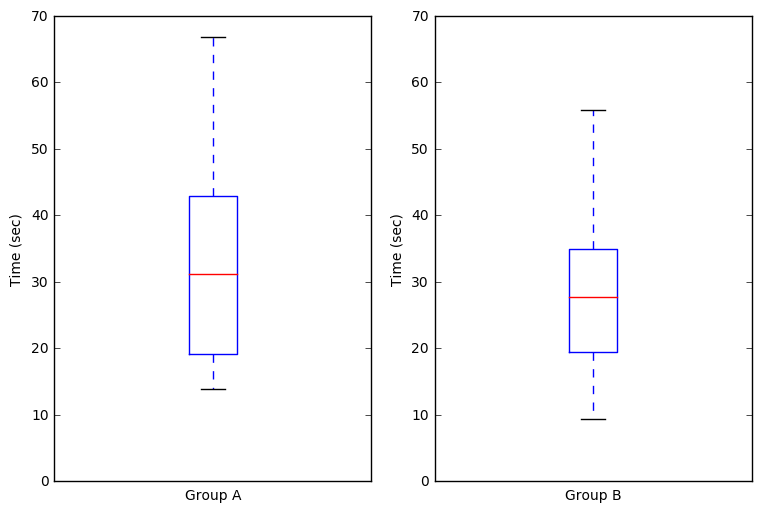

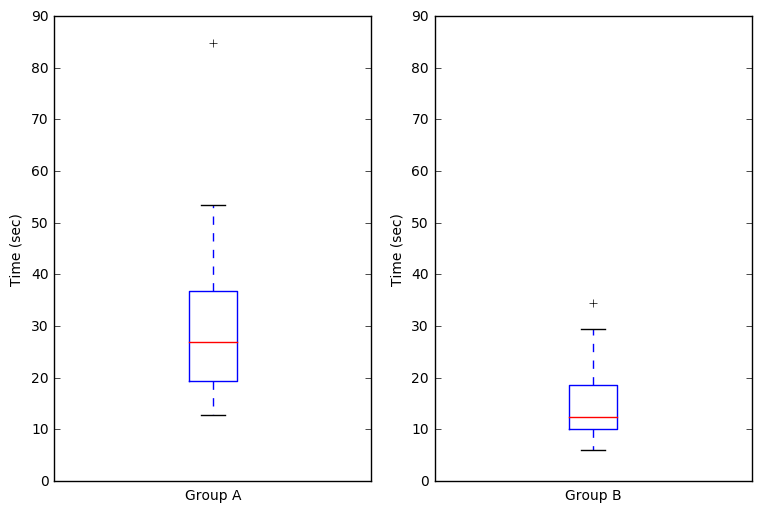

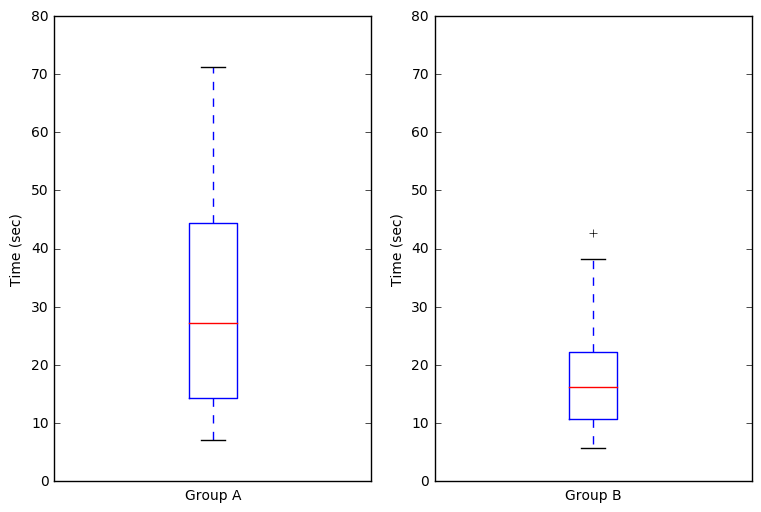

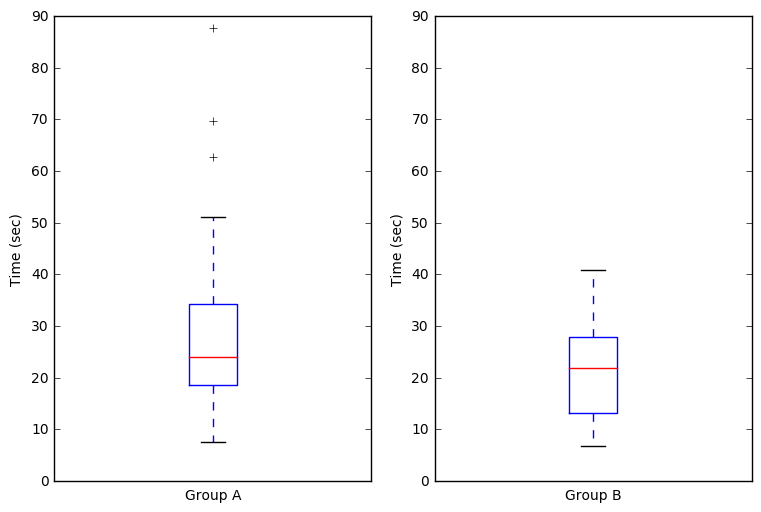

In [24]:
%matplotlib inline
measure = "duration"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]





def boxplot(figureSubtitle, ylabel, MA, MB):
    fig = plt.figure(figsize=(9,6))
    #fig.suptitle(figureSubtitle, fontsize=14, fontweight='bold')

    ax1A = fig.add_subplot(121)
    ax1A.set_ylabel(ylabel)
    ax1A.set_xlabel("Group A")
    ax1A.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
    bp1A = ax1A.boxplot(MA)

    ax1B = fig.add_subplot(122, sharey = ax1A)
    ax1B.set_ylabel(ylabel)
    ax1B.set_xlabel("Group B")
    ax1B.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
    bp1B = ax1B.boxplot(MB)
    
    return fig
db = "DurationBoxplot"    
m1 = boxplot("Model 1 duration", "Time (sec)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 duration", "Time (sec)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 duration", "Time (sec)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 duration", "Time (sec)", M4A, M4B)
m4.savefig("M4"+db)

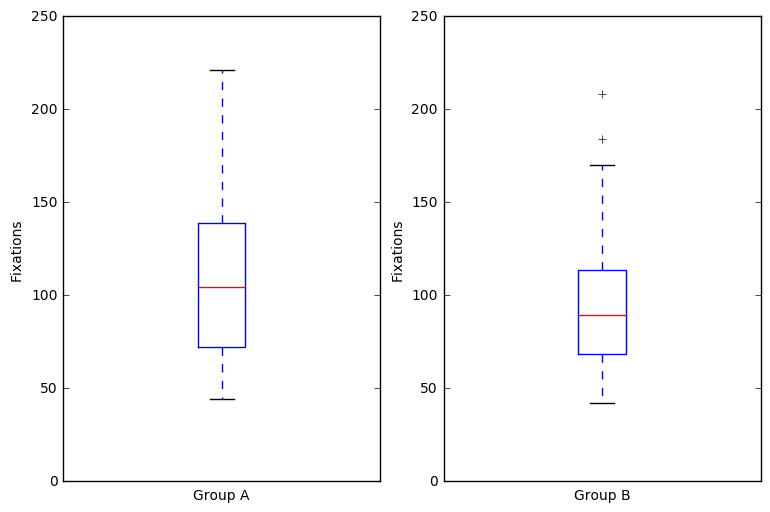

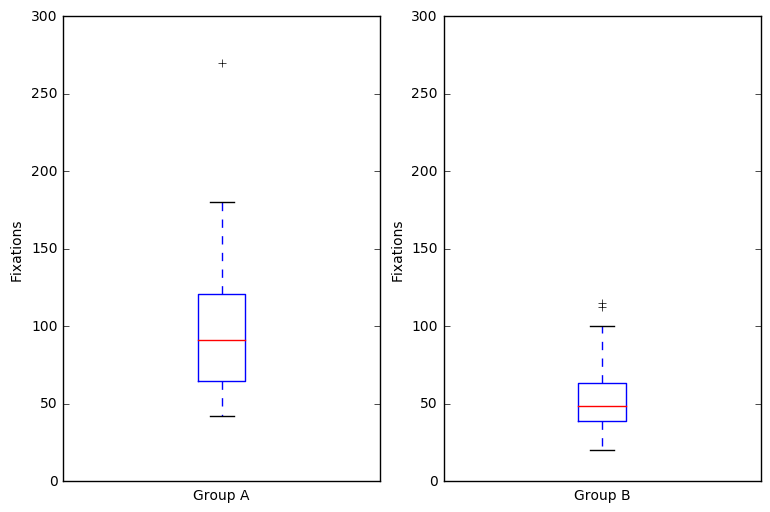

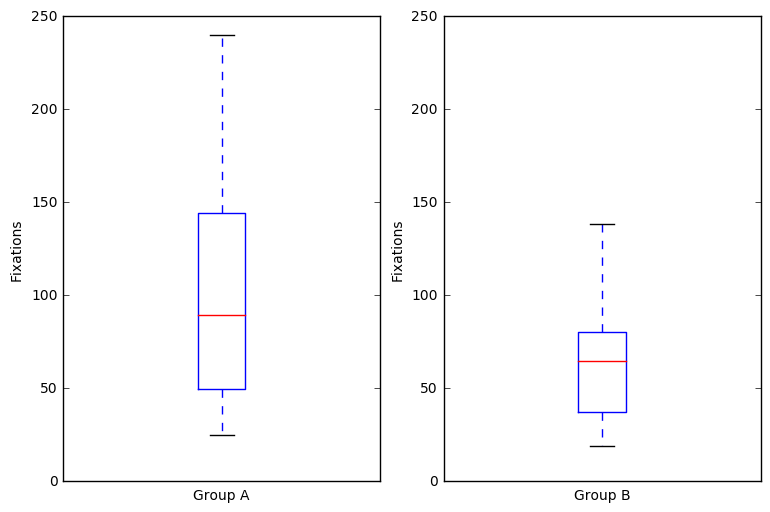

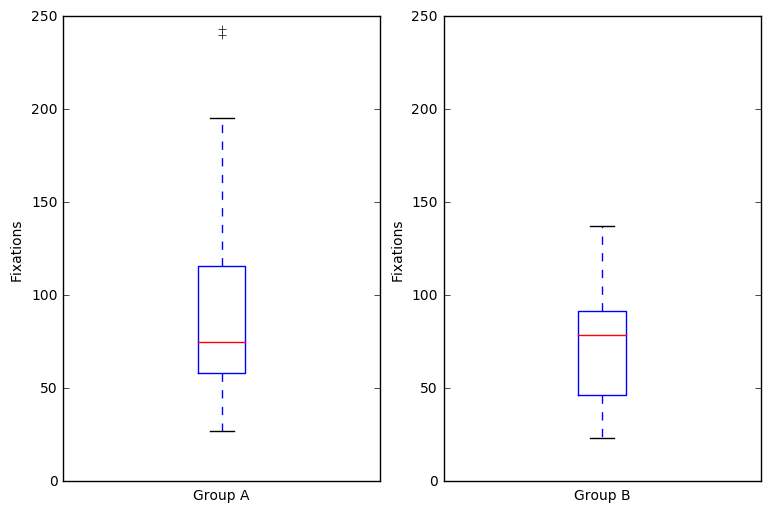

In [25]:
measure = "amountOfFixations"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "amountOfFixationsBoxplot"    
m1 = boxplot("Model 1 fixation amount", "Fixations", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 fixation amount", "Fixations", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 fixation amount", "Fixations", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 fixation amount", "Fixations", M4A, M4B)
m4.savefig("M4"+db)

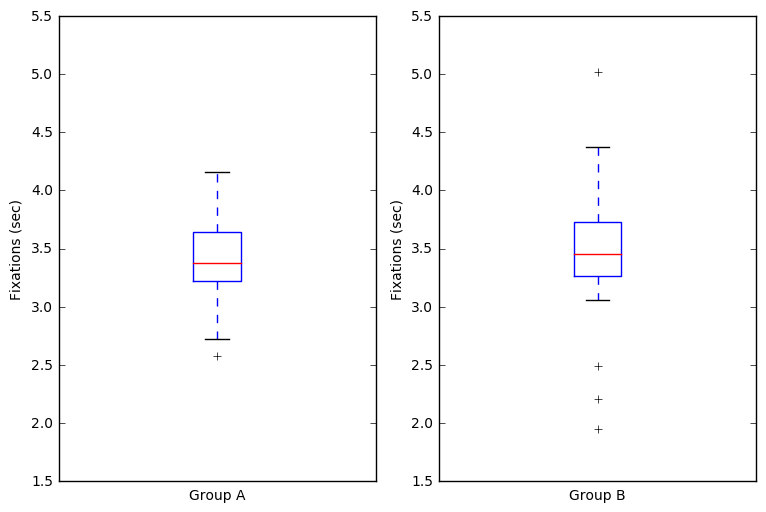

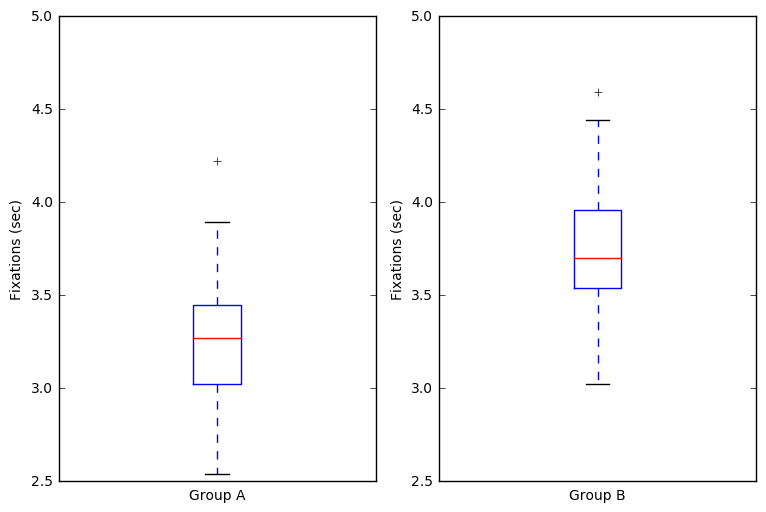

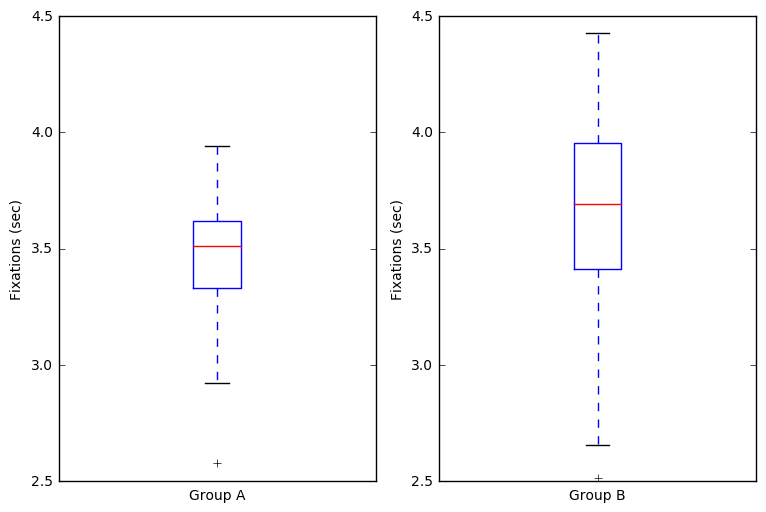

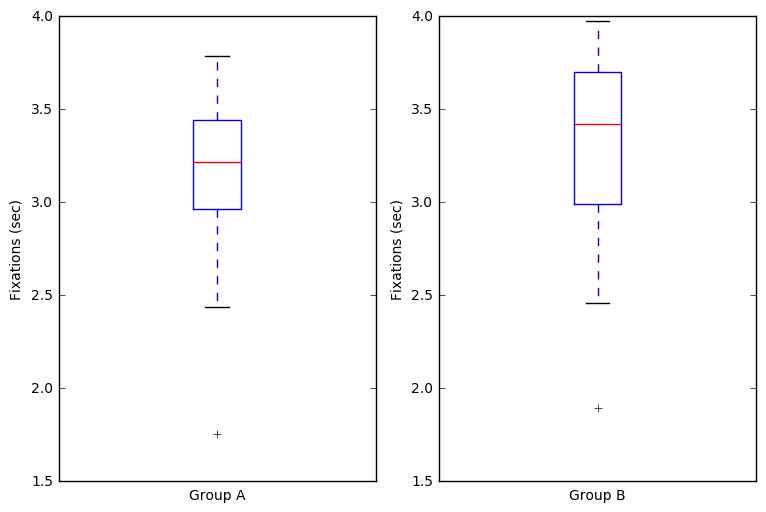

In [26]:
measure = "fixationsPerSecond"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "fixationsPerSecondBoxplot"    
m1 = boxplot("Model 1 fixations per second", "Fixations (sec)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 fixations per second", "Fixations (sec)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 fixations per second", "Fixations (sec)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 fixations per second", "Fixations (sec)", M4A, M4B)
m4.savefig("M4"+db)

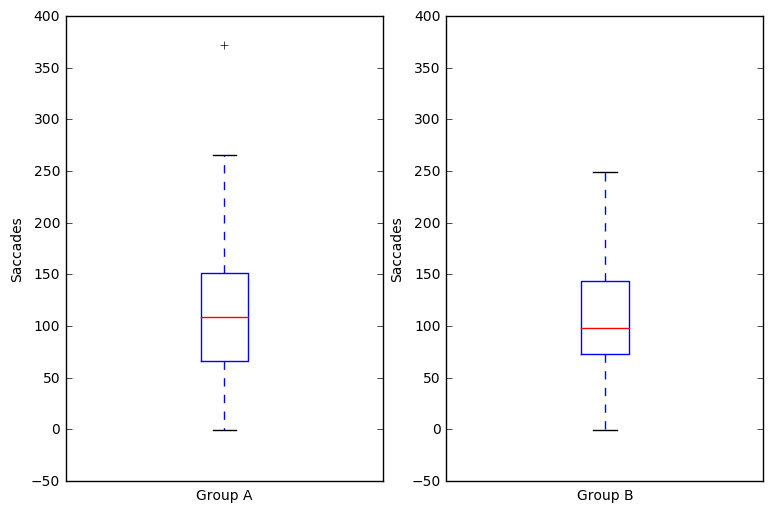

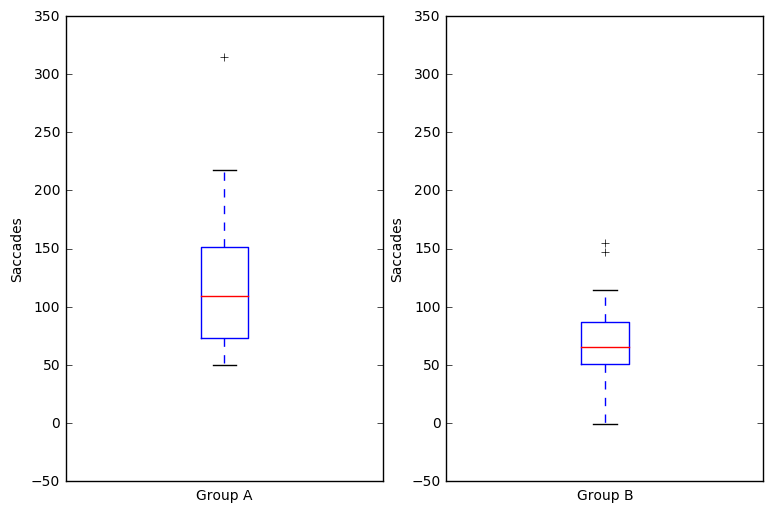

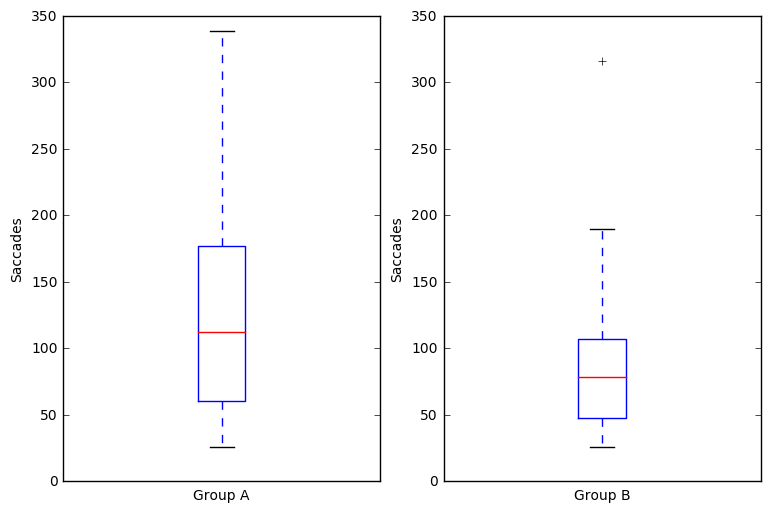

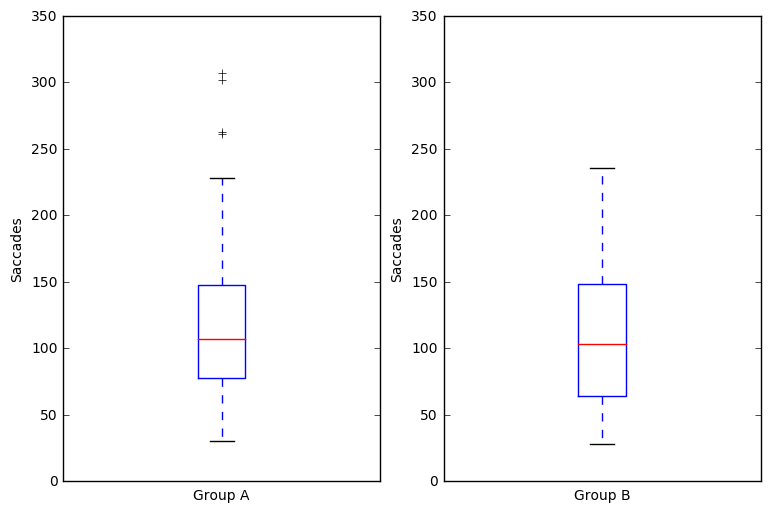

In [27]:
measure = "amountOfSaccades"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "amountOfSaccadesBoxplot"    
m1 = boxplot("Model 1 amount of saccades", "Saccades", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 amount of saccades", "Saccades", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 amount of saccades", "Saccades", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 amount of saccades", "Saccades", M4A, M4B)
m4.savefig("M4"+db)

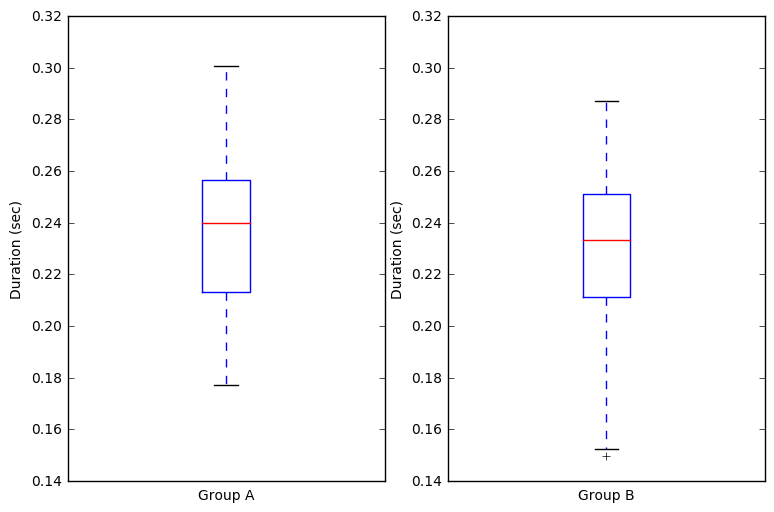

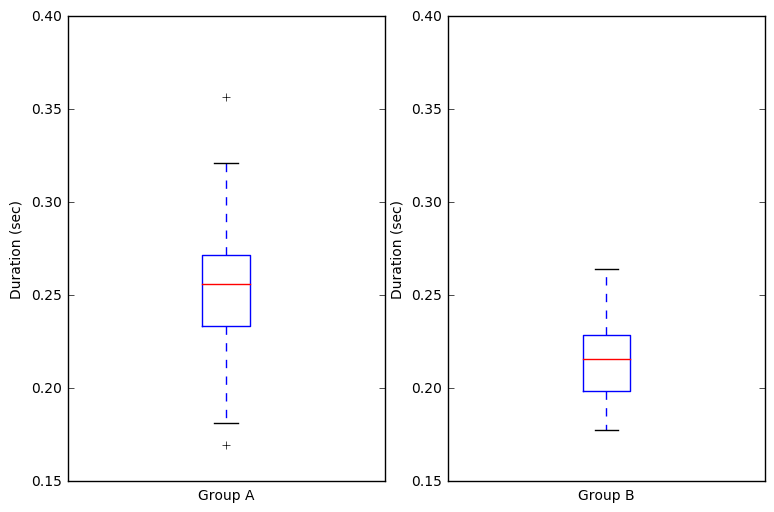

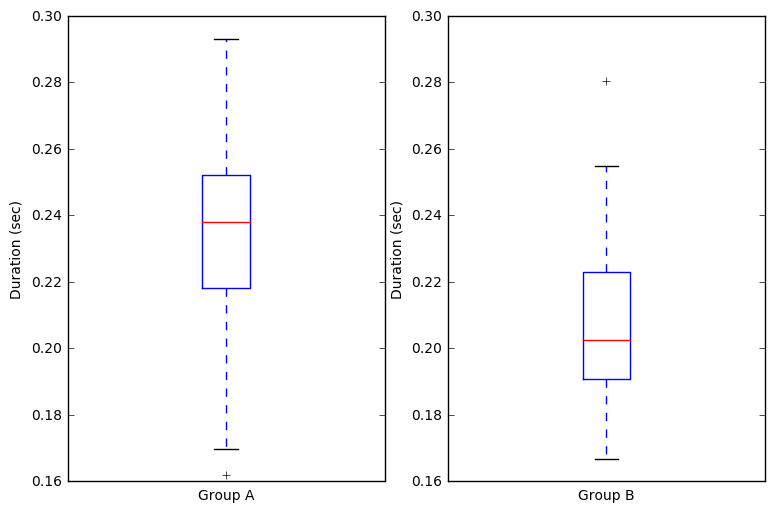

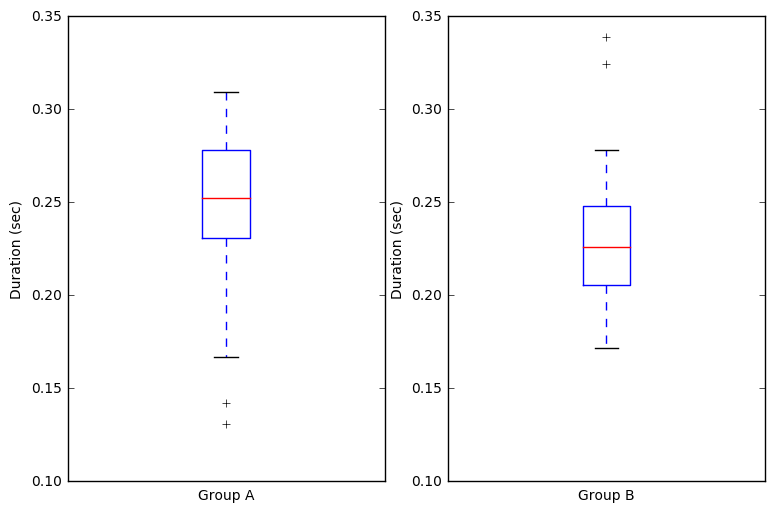

In [28]:
measure = "fixationDuration"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "fixationDurationBoxplot"    
m1 = boxplot("Model 1 fixation duration", "Duration (sec)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 fixation duration", "Duration (sec)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 fixation duration", "Duration (sec)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 fixation duration", "Duration (sec)", M4A, M4B)
m4.savefig("M4"+db)

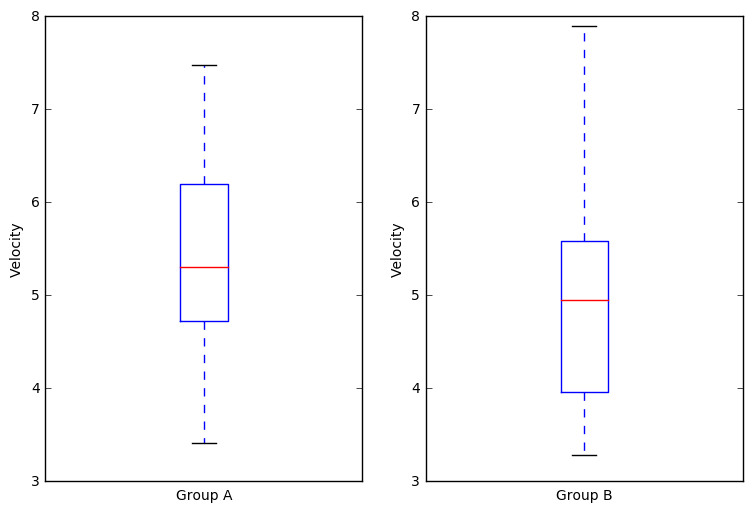

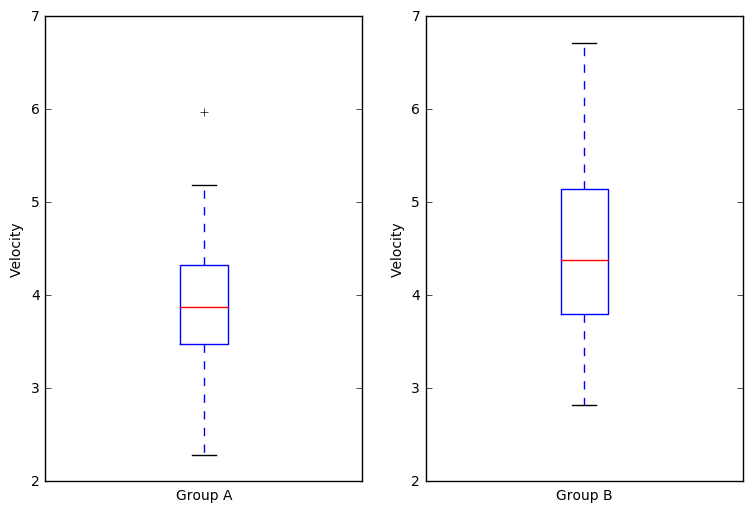

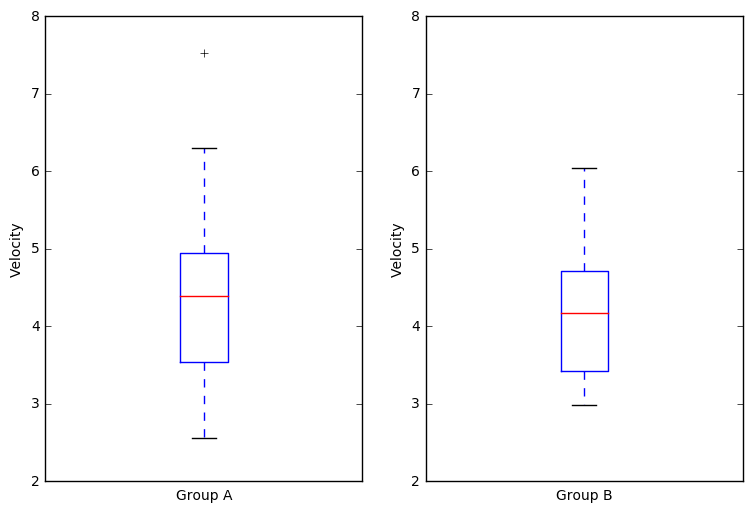

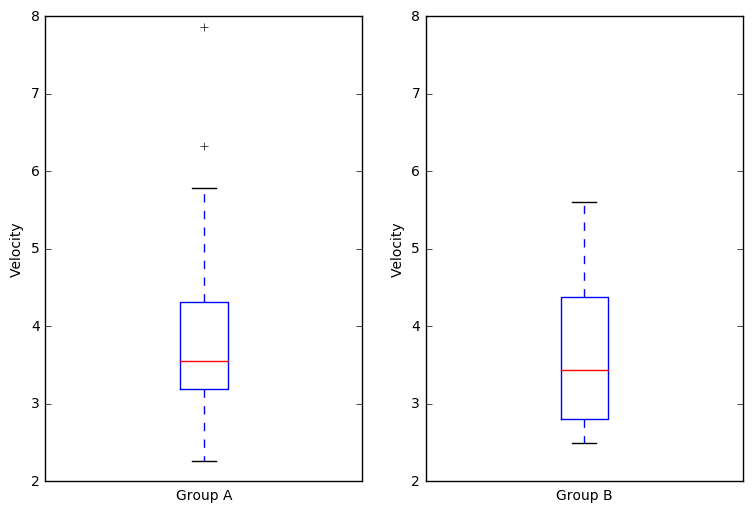

In [29]:
measure = "saccadeVelocityList"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "saccadeVelocityBoxplot"    
m1 = boxplot("Model 1 saccade velocity", "Velocity", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 saccade velocity", "Velocity", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 saccade velocity", "Velocity", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 saccade velocity", "Velocity", M4A, M4B)
m4.savefig("M4"+db)

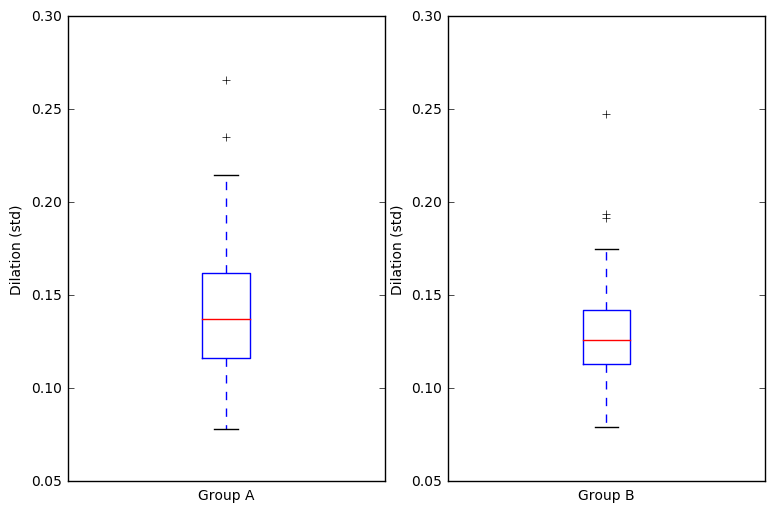

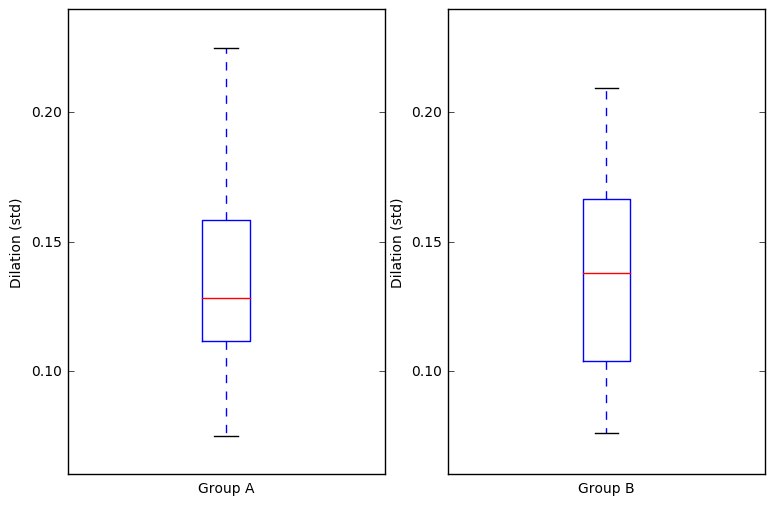

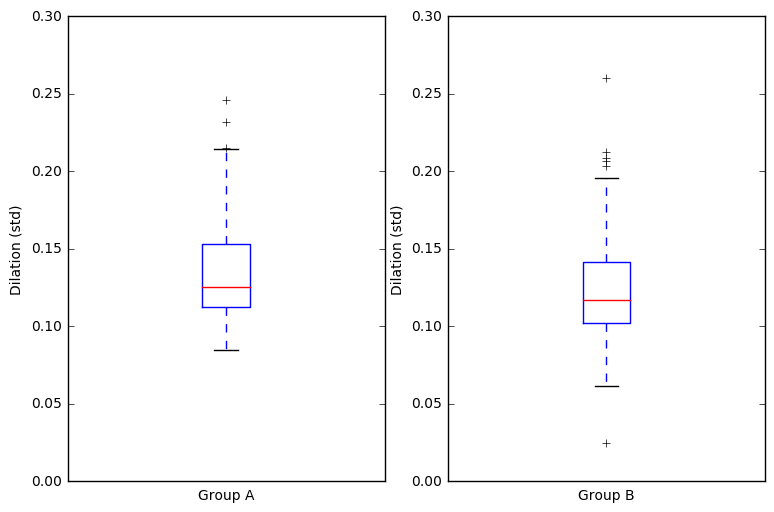

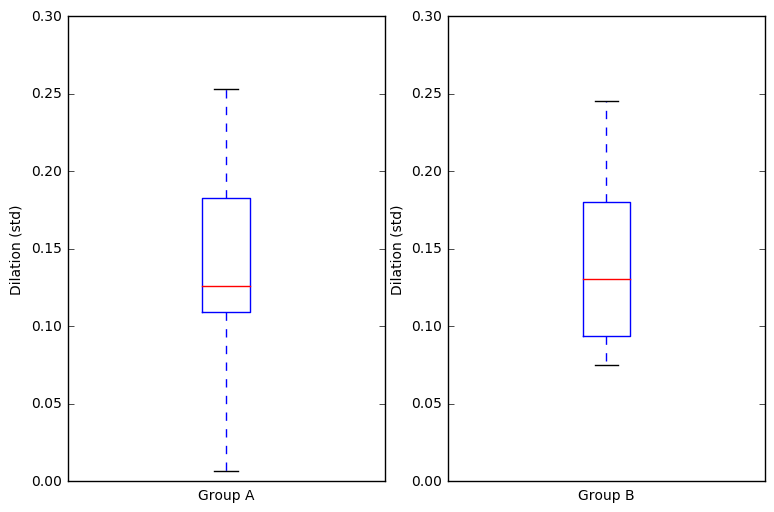

In [84]:
measure = "pupilDilationLeftList"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "pupilDilationLeftListBoxplot"    
m1 = boxplot("Model 1 pupil dilation (left eye)", "Dilation (std)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 pupil dilation (left eye)", "Dilation (std)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 pupil dilation (left eye)", "Dilation (std)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 pupil dilation (left eye)", "Dilation (std)", M4A, M4B)
m4.savefig("M4"+db)

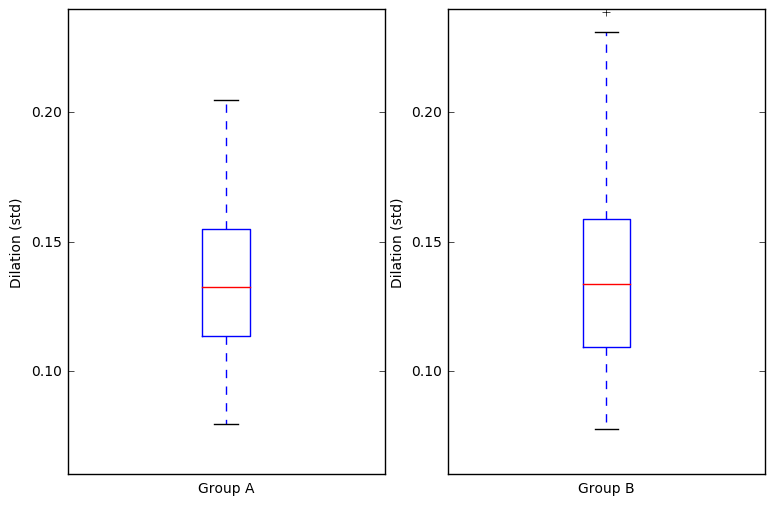

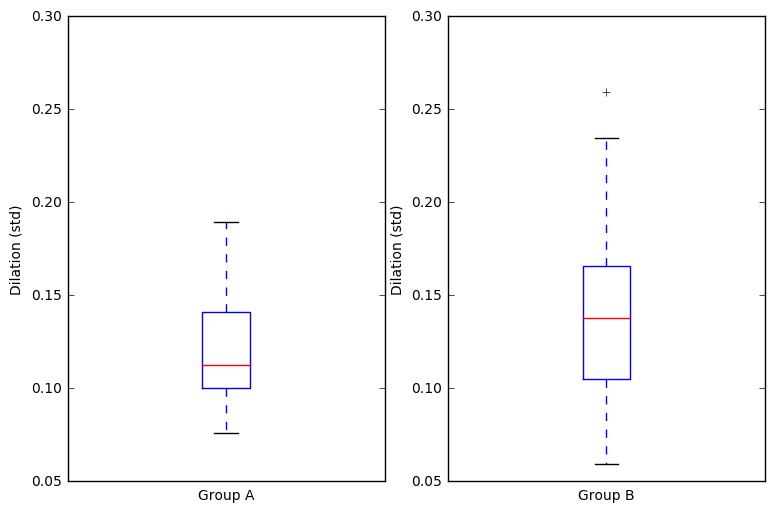

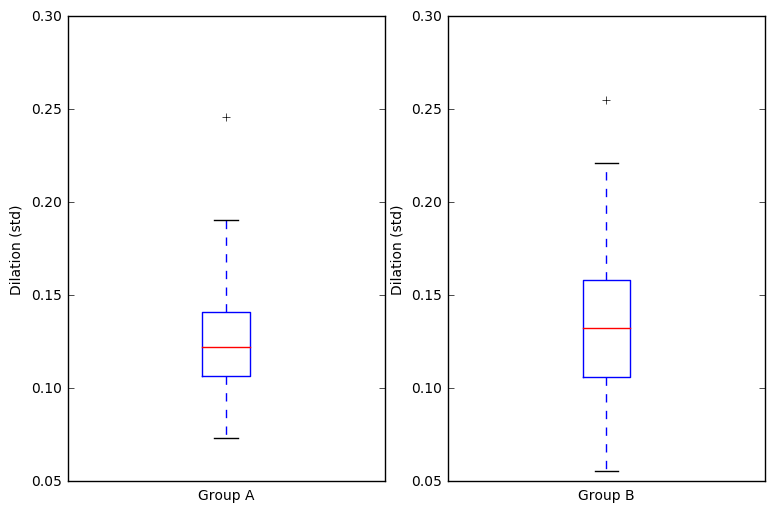

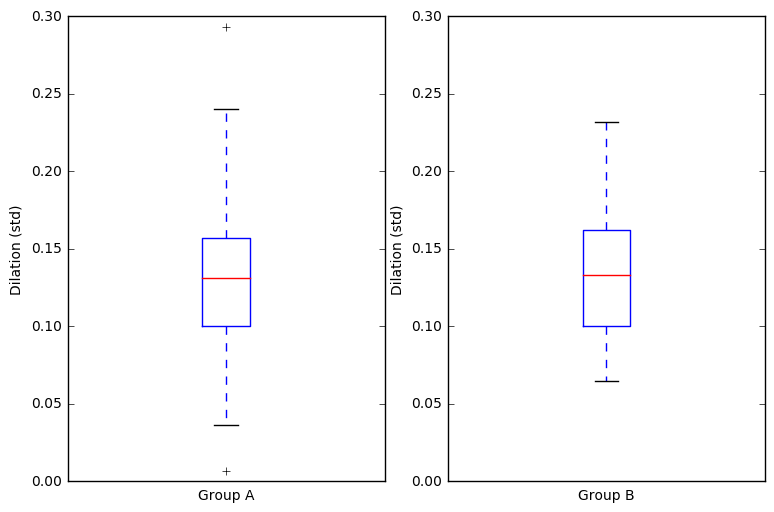

In [85]:
measure = "pupilDilationRightList"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "pupilDilationRightListBoxplot"    
m1 = boxplot("Model 1 pupil dilation (right eye)", "Dilation (std)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 pupil dilation (right eye)", "Dilation (std)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 pupil dilation (right eye)", "Dilation (std)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 pupil dilation (right eye)", "Dilation (std)", M4A, M4B)
m4.savefig("M4"+db)

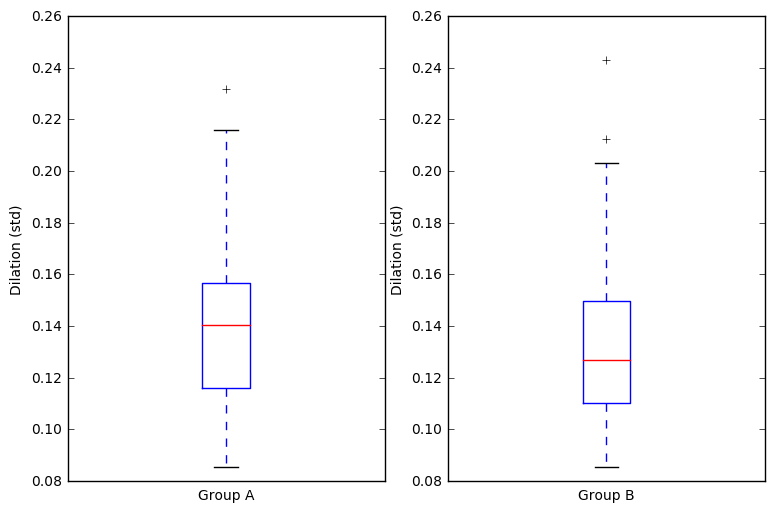

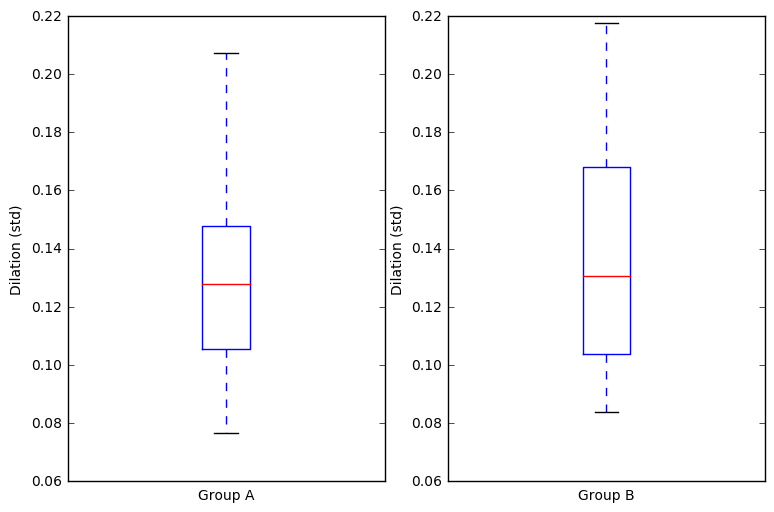

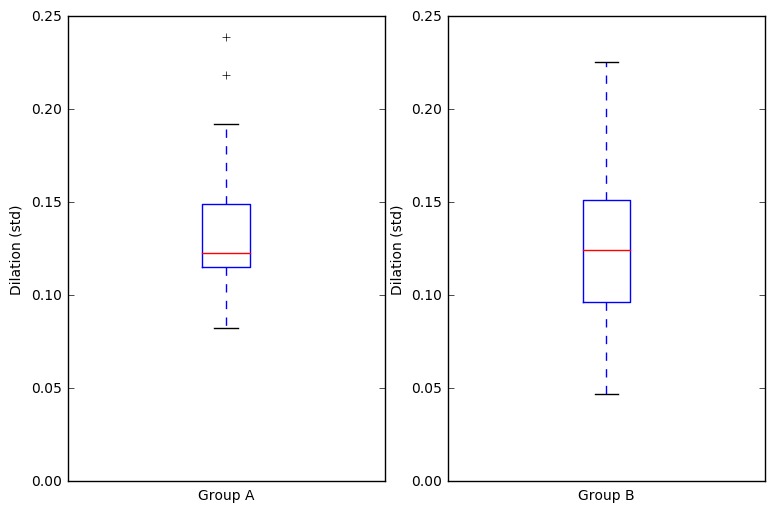

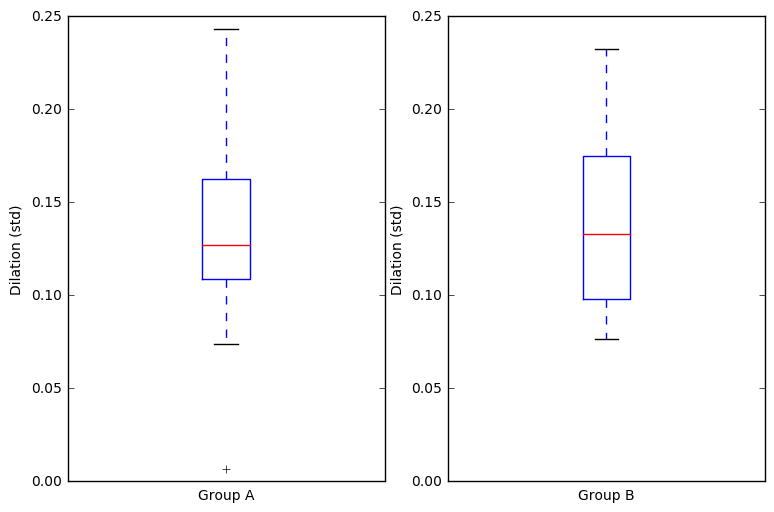

In [86]:
measure = "pupilDilationMean"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "pupilDilationMeanBoxplot"    
m1 = boxplot("Model 1 pupil dilation", "Dilation (std)", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 pupil dilation", "Dilation (std)", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 pupil dilation", "Dilation (std)", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 pupil dilation", "Dilation (std)", M4A, M4B)
m4.savefig("M4"+db)

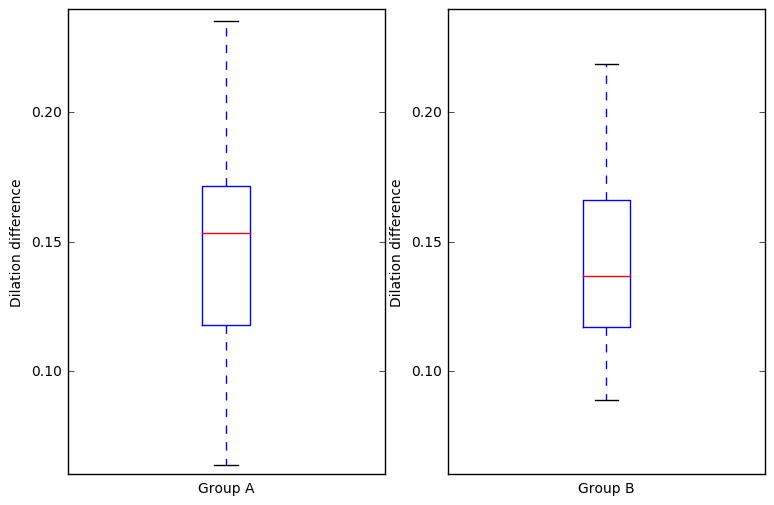

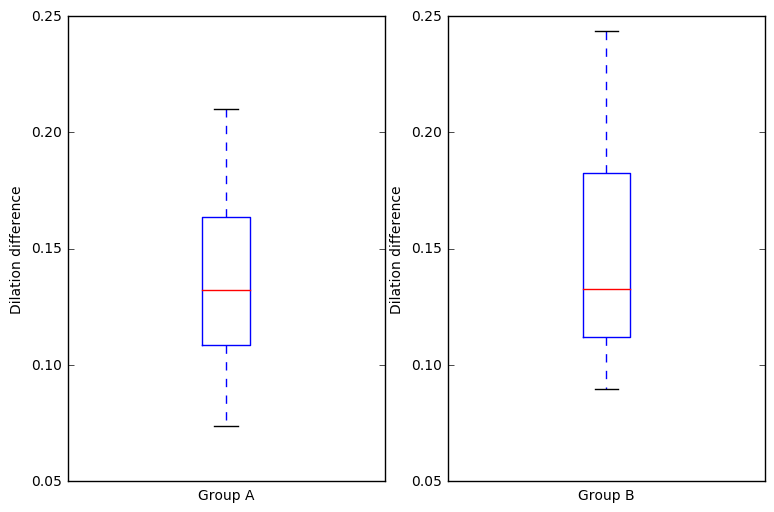

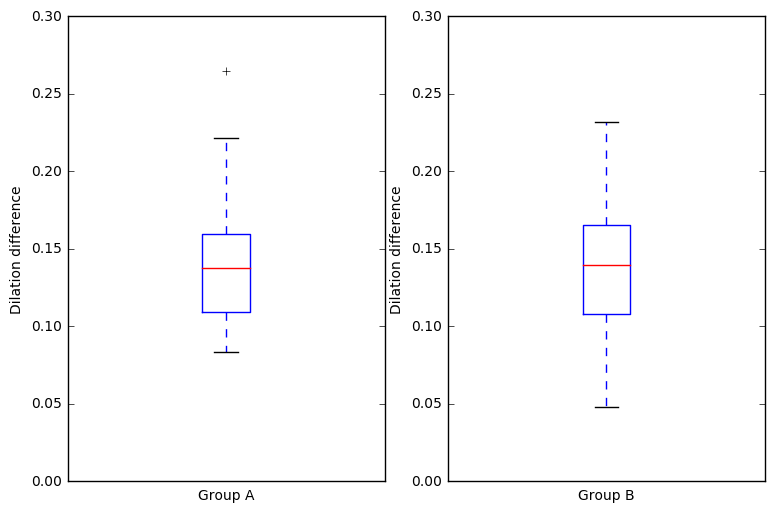

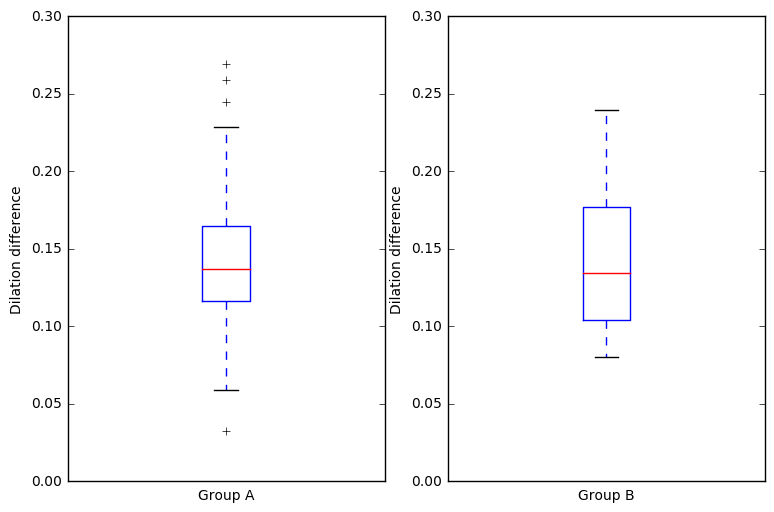

In [87]:
measure = "pupilDilationDiff"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]


db = "pupilDilationDiffBoxplot"    
m1 = boxplot("Model 1 pupil dilation", "Dilation difference", M1A, M1B)
m1.savefig("M1"+db)
m2 = boxplot("Model 2 pupil dilation", "Dilation difference", M2A, M2B)
m2.savefig("M2"+db)
m3 = boxplot("Model 3 pupil dilation", "Dilation difference", M3A, M3B)
m3.savefig("M3"+db)
m4 = boxplot("Model 4 pupil dilation", "Dilation difference", M4A, M4B)
m4.savefig("M4"+db)

In [88]:
measure = "fixationsPerSecond"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A

print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))

78
fixationsPerSecond	|Mean		|Variance	|Standard diviation
Messy direction 	|3.45699826732	|0.172253985791	|0.415034921171	1.94463259554	5.0202948088
Non messy direction 	|3.53261485975	|0.181061376069	|0.425513073911	2.51148719998	4.42791356713
Messy visibility 	|3.29366997219	|0.166489083489	|0.408030738412	1.8936275317	4.21966731898
Non messy visibility 	|3.44421753067	|0.217658173741	|0.466538501885	1.75262894342	4.59286192709


In [89]:
measure = "fixationDuration"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A

print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))

78
fixationDuration	|Mean		|Variance	|Standard diviation
Messy direction 	|0.23052422907	|0.00096860133686	|0.0311223607212	0.149520833333	0.293
Non messy direction 	|0.223091764728	|0.00098653576443	|0.0314091668853	0.166638297872	0.300745098039
Messy visibility 	|0.241842860951	|0.00139187227824	|0.0373078045219	0.169347826087	0.35656122449
Non messy visibility 	|0.233450438009	|0.00137354569833	|0.0370613774478	0.130833333333	0.309149253731


In [90]:
measure = "saccadeVelocityList"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A
print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))

78
saccadeVelocityList	|Mean		|Variance	|Standard diviation
Messy direction 	|4.62813466957	|1.25761182354	|1.12143293314	2.56	7.89471698113
Non messy direction 	|4.86215144808	|1.27918149276	|1.13100905954	2.98181818182	7.47135135135
Messy visibility 	|3.79540915362	|0.705986190379	|0.84022984378	2.28357142857	5.97259259259
Non messy visibility 	|4.14350663887	|1.18410020009	|1.08816368258	2.26119402985	7.85952380952


In [91]:
measure = "amountOfFixations"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A
print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))

78
amountOfFixations	|Mean		|Variance	|Standard diviation
Messy direction 	|100.384615385	|2537.41617357	|50.372772145	25	240
Non messy direction 	|88.9743589744	|2167.28139382	|46.5540695731	19	221
Messy visibility 	|85.3076923077	|1585.34122288	|39.8163436654	23	270
Non messy visibility 	|74.0512820513	|1960.48454964	|44.2773593345	20	243


In [92]:
measure = "pupilDilationMean"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

TUT = data["TUTX-Q01.png"][measure] + data["TUTX-Q02.png"][measure] + data["TUTX-Q03.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A
print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))
print ""
print "TUT \t" + str(np.mean(TUT)) + "\t" + str(np.var(TUT)) + "\t" + str(np.std(TUT)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))


78
pupilDilationMean	|Mean		|Variance	|Standard diviation
Messy direction 	|0.134346224337	|0.00117373177869	|0.0342597690986	0.0823820249338	0.24311391347
Non messy direction 	|0.135976349293	|0.00139554750472	|0.0373570275146	0.0466114574949	0.231709188667
Messy visibility 	|0.13268463306	|0.00142432658391	|0.0377402515083	0.0762652293737	0.23244161892
Non messy visibility 	|0.138523020833	|0.00189528882892	|0.0435349150558	0.00650587752933	0.243114919595

TUT 	0.161363067347	0.00115775540166	0.0340258049377	0.00650587752933	0.243114919595


In [93]:
measure = "pupilDilationDiff"
M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

messyDirection = M1B + M3A
nonMessyDirection = M1A + M3B
messyVisibility = M2A + M4B
nonMessyVisibility = M2B + M4A
print len(messyDirection)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy direction \t|" + str(np.mean(messyDirection)) + "\t|" + str(np.var(messyDirection)) + "\t|" + str(np.std(messyDirection)) + "\t" + str(min(messyDirection)) + "\t" + str(max(messyDirection))
print "Non messy direction \t|" + str(np.mean(nonMessyDirection)) + "\t|" + str(np.var(nonMessyDirection)) + "\t|" + str(np.std(nonMessyDirection)) + "\t" + str(min(nonMessyDirection)) + "\t" + str(max(nonMessyDirection))
print "Messy visibility \t|" + str(np.mean(messyVisibility)) + "\t|" + str(np.var(messyVisibility)) + "\t|" + str(np.std(messyVisibility)) + "\t" + str(min(messyVisibility)) + "\t" + str(max(messyVisibility))
print "Non messy visibility \t|" + str(np.mean(nonMessyVisibility)) + "\t|" + str(np.var(nonMessyVisibility)) + "\t|" + str(np.std(nonMessyVisibility)) + "\t" + str(min(nonMessyVisibility)) + "\t" + str(max(nonMessyVisibility))

78
pupilDilationDiff	|Mean		|Variance	|Standard diviation
Messy direction 	|0.141506546043	|0.00141575843897	|0.0376265656016	0.083048198367	0.264398662264
Non messy direction 	|0.143136670999	|0.00167501786697	|0.0409269821386	0.0475239271504	0.235435056615
Messy visibility 	|0.139844954766	|0.00166239919062	|0.0407725298531	0.0734999622368	0.23909323942
Non messy visibility 	|0.14568334254	|0.00228362644513	|0.0477873042254	0.0323753396043	0.26898438167


In [94]:
measure = "fixationsPerSecond"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL + messyL
nonMessyG = M1AG + M3BG + M2BG + M4AG + messyG

print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG)) + "\t" + str(min(nonMessyG)) + "\t" + str(max(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL)) + "\t" + str(min(nonMessyL)) + "\t" + str(max(nonMessyL))

fixationsPerSecond	|Mean		|Variance	|Standard diviation
Messy Global 		|3.41175784243	|0.134525327585	|0.366776945275
Messy Local 		|3.33891039707	|0.214902432543	|0.463575703141
Non Messy Global 	|3.44494876937	|0.180155739839	|0.424447570189	1.75262894342	4.43915973048
Non Messy Local 	|3.41880154559	|0.20325006389	|0.450832634012	1.8936275317	5.0202948088


In [95]:
measure = "fixationDuration"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL + messyL
nonMessyG = M1AG + M3BG + M2BG + M4AG + messyG

print measure + "\t|Mean\t\t|Variance\t\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG)) + "\t" + str(min(nonMessyG)) + "\t" + str(max(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL)) + "\t" + str(min(nonMessyL)) + "\t" + str(max(nonMessyL))

fixationDuration	|Mean		|Variance		|Standard diviation
Messy Global 		|0.232352192983	|0.0009056954186	|0.0300947739417
Messy Local 		|0.240014897038	|0.00148947539362	|0.0385937222048
Non Messy Global 	|0.229121449047	|0.0010777518694	|0.032829131414	0.130833333333	0.308814814815
Non Messy Local 	|0.235333197332	|0.0013533895283	|0.0367884428632	0.149520833333	0.35656122449


In [96]:
measure = "saccadeVelocityList"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL + messyL
nonMessyG = M1AG + M3BG + M2BG + M4AG + messyG

print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG)) + "\t" + str(min(nonMessyG)) + "\t" + str(max(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL)) + "\t" + str(min(nonMessyL)) + "\t" + str(max(nonMessyL))

saccadeVelocityList	|Mean		|Variance	|Standard diviation
Messy Global 		|4.34426196832	|1.07072551433	|1.03475867444
Messy Local 		|4.07928185487	|1.20448116179	|1.09748857023
Non Messy Global 	|4.46739793903	|1.27556973508	|1.12941123382	2.4856626506	7.89471698113
Non Messy Local 	|4.24720301604	|1.25845487994	|1.12180875373	2.26119402985	7.52828125


In [97]:
measure = "duration"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL
nonMessyG = M1AG + M3BG + M2BG + M4AG

print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL))

duration	|Mean		|Variance	|Standard diviation
Messy Global 		|34.6147564103	|198.77947203	|14.0989174063
Messy Local 		|21.0708333333	|94.7407549594	|9.73348626954
Non Messy Global 	|30.4807307692	|232.705635581	|15.254692248
Non Messy Local 	|17.4070897436	|95.725089774	|9.7839199595


In [98]:
measure = "amountOfFixations"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL + messyL
nonMessyG = M1AG + M3BG + M2BG + M4AG + messyG
print len(nonMessyG)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG)) + "\t" + str(min(nonMessyG)) + "\t" + str(max(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL)) + "\t" + str(min(nonMessyL)) + "\t" + str(max(nonMessyL))

156
amountOfFixations	|Mean		|Variance	|Standard diviation
Messy Global 		|116.576923077	|2136.75690335	|46.2250679107
Messy Local 		|69.1153846154	|973.358481262	|31.1986935826
Non Messy Global 	|109.897435897	|2252.83563445	|47.4640457025	21	270
Non Messy Local 	|64.4615384615	|1016.9408284	|31.8895096921	19	221


In [99]:
measure = "pupilDilationDiff"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL + messyL
nonMessyG = M1AG + M3BG + M2BG + M4AG + messyG
print len(nonMessyG)
print measure + "\t|Mean\t\t|Variance\t|Standard diviation"
print "Messy Global \t\t|" + str(np.mean(messyG)) + "\t|" + str(np.var(messyG)) + "\t|" + str(np.std(messyG))
print "Messy Local \t\t|" + str(np.mean(messyL)) + "\t|" + str(np.var(messyL)) + "\t|" + str(np.std(messyL))
print "Non Messy Global \t|" + str(np.mean(nonMessyG)) + "\t|" + str(np.var(nonMessyG)) + "\t|" + str(np.std(nonMessyG)) + "\t" + str(min(nonMessyG)) + "\t" + str(max(nonMessyG))
print "Non Messy Local \t|" + str(np.mean(nonMessyL)) + "\t|" + str(np.var(nonMessyL)) + "\t|" + str(np.std(nonMessyL)) + "\t" + str(min(nonMessyL)) + "\t" + str(max(nonMessyL))

156
pupilDilationDiff	|Mean		|Variance	|Standard diviation
Messy Global 		|0.143692793067	|0.00151119460841	|0.0388740865926
Messy Local 		|0.137658707742	|0.00155013837111	|0.0393717966457
Non Messy Global 	|0.144638295455	|0.00167159311898	|0.0408851209975	0.0323753396043	0.258879507018
Non Messy Local 	|0.14044746172	|0.00184731024884	|0.0429803472397	0.0475239271504	0.26898438167


In [100]:
measure = "fixationsPerSecond"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL
print len(messyDirectionGlobal)
print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal)) + "\t" + str(min(messyDirectionGlobal)) + "\t" + str(max(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal)) + "\t" + str(min(nonMessyDirectionGlobal)) + "\t" + str(max(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal)) + "\t" + str(min(messyDirectionLocal)) + "\t" + str(max(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal)) + "\t" + str(min(nonMessyDirectionLocal)) + "\t" + str(max(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal)) + "\t" + str(min(messyVisibilityGlobal)) + "\t" + str(max(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal)) + "\t" + str(min(nonMessyVisibilityGlobal)) + "\t" + str(max(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal)) + "\t" + str(min(messyVisibilityLocal)) + "\t" + str(max(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal)) + "\t" + str(min(nonMessyVisibilityLocal)) + "\t" + str(max(nonMessyVisibilityLocal))

39
fixationsPerSecond	|Mean		|Variance	|Standard deviation
Messy direction global 	|3.47454283925	|0.145758404347	|0.381783190236	2.20163287772	4.37268752102
Non messy direction global 	|3.51311474226	|0.187966651048	|0.433551209256	2.51148719998	4.29400516622
Messy direction local 	|3.43945369539	|0.198133943227	|0.44512239129	1.94463259554	5.0202948088
Non messy direction local 	|3.55211497724	|0.173395591926	|0.416407963332	2.65617314314	4.42791356713
Messy visibility global 	|3.34897284561	|0.115408339172	|0.339718028918	2.4597811643	4.21966731898
Non messy visibility global 	|3.44316465035	|0.256752594936	|0.506707602998	1.75262894342	4.43915973048
Messy visibility local 	|3.23836709876	|0.211453012187	|0.459840202883	1.8936275317	3.97292525015
Non messy visibility local 	|3.44527041099	|0.178561535433	|0.422565421482	2.60117052674	4.59286192709


In [101]:
measure = "fixationDuration"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL
print len(messyDirectionGlobal)
print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal)) + "\t" + str(min(messyDirectionGlobal)) + "\t" + str(max(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal)) + "\t" + str(min(nonMessyDirectionGlobal)) + "\t" + str(max(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal)) + "\t" + str(min(messyDirectionLocal)) + "\t" + str(max(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal)) + "\t" + str(min(nonMessyDirectionLocal)) + "\t" + str(max(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal)) + "\t" + str(min(messyVisibilityGlobal)) + "\t" + str(max(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal)) + "\t" + str(min(nonMessyVisibilityGlobal)) + "\t" + str(max(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal)) + "\t" + str(min(messyVisibilityLocal)) + "\t" + str(max(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal)) + "\t" + str(min(nonMessyVisibilityLocal)) + "\t" + str(max(nonMessyVisibilityLocal))

39
fixationDuration	|Mean		|Variance	|Standard deviation
Messy direction global 	|0.226199930783	|0.000829151726158	|0.0287949948109	0.159569230769	0.281832116788
Non messy direction global 	|0.221255096893	|0.000888565956031	|0.0298088234594	0.1735859375	0.280363636364
Messy direction local 	|0.234848527358	|0.0010706518362	|0.0327208165577	0.149520833333	0.293
Non messy direction local 	|0.224928432564	|0.00107775887535	|0.0328292381171	0.166638297872	0.300745098039
Messy visibility global 	|0.238504455184	|0.000906538450668	|0.0301087769706	0.169347826087	0.292092307692
Non messy visibility global 	|0.23052631333	|0.00152632213173	|0.0390681728742	0.130833333333	0.308814814815
Messy visibility local 	|0.245181266719	|0.00185491619969	|0.0430687380786	0.171666666667	0.35656122449
Non messy visibility local 	|0.236374562687	|0.00120366825466	|0.0346939224456	0.166655737705	0.309149253731


In [102]:
measure = "saccadeVelocityList"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL

print len(messyDirectionGlobal)
print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal)) + "\t" + str(min(messyDirectionGlobal)) + "\t" + str(max(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal)) + "\t" + str(min(nonMessyDirectionGlobal)) + "\t" + str(max(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal)) + "\t" + str(min(messyDirectionLocal)) + "\t" + str(max(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal)) + "\t" + str(min(nonMessyDirectionLocal)) + "\t" + str(max(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal)) + "\t" + str(min(messyVisibilityGlobal)) + "\t" + str(max(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal)) + "\t" + str(min(nonMessyVisibilityGlobal)) + "\t" + str(max(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal)) + "\t" + str(min(messyVisibilityLocal)) + "\t" + str(max(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal)) + "\t" + str(min(nonMessyVisibilityLocal)) + "\t" + str(max(nonMessyVisibilityLocal))

39
saccadeVelocityList	|Mean		|Variance	|Standard deviation
Messy direction global 	|4.76000976254	|1.09945339109	|1.04854823022	3.27571428571	7.89471698113
Non messy direction global 	|5.00075376293	|1.27708813616	|1.13008324302	2.98181818182	7.47135135135
Messy direction local 	|4.49625957661	|1.3809881757	|1.17515453269	2.56	7.52828125
Non messy direction local 	|4.72354913323	|1.242853646	|1.11483346111	3.06391304348	7.09164705882
Messy visibility global 	|3.92851417409	|0.696305180766	|0.834449028261	2.4856626506	5.97259259259
Non messy visibility global 	|4.18031405655	|1.28652925047	|1.13425272778	2.51059322034	7.85952380952
Messy visibility local 	|3.66230413314	|0.68023330704	|0.824762576163	2.28357142857	5.33434782609
Non messy visibility local 	|4.1066992212	|1.07896157772	|1.03873075323	2.26119402985	6.70702702703


In [103]:
measure = "amountOfFixations"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL
print len(messyDirectionGlobal)
print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal)) + "\t" + str(min(messyDirectionGlobal)) + "\t" + str(max(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal)) + "\t" + str(min(nonMessyDirectionGlobal)) + "\t" + str(max(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal)) + "\t" + str(min(messyDirectionLocal)) + "\t" + str(max(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal)) + "\t" + str(min(nonMessyDirectionLocal)) + "\t" + str(max(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal)) + "\t" + str(min(messyVisibilityGlobal)) + "\t" + str(max(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal)) + "\t" + str(min(nonMessyVisibilityGlobal)) + "\t" + str(max(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal)) + "\t" + str(min(messyVisibilityLocal)) + "\t" + str(max(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal)) + "\t" + str(min(nonMessyVisibilityLocal)) + "\t" + str(max(nonMessyVisibilityLocal))

39
amountOfFixations	|Mean		|Variance	|Standard deviation
Messy direction global 	|130.538461538	|2003.17159763	|44.7568050427	57	240
Non messy direction global 	|113.948717949	|1714.76660092	|41.4097404112	38	202
Messy direction local 	|70.2307692308	|1253.15187377	|35.3998852225	25	208
Non messy direction local 	|64.0	|1372.35897436	|37.0453637364	19	221
Messy visibility global 	|102.615384615	|1880.49309665	|43.3646526176	37	270
Non messy visibility global 	|92.4871794872	|2614.30111769	|51.1302368241	21	243
Messy visibility local 	|68.0	|691.076923077	|26.2883419614	23	122
Non messy visibility local 	|55.6153846154	|626.903353057	|25.0380381232	20	122


In [104]:
measure = "duration"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL

print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal))

duration	|Mean		|Variance	|Standard deviation
Messy direction global 	|38.0456153846	|176.813718339	|13.2971319592
Non messy direction global 	|32.9828717949	|160.841944419	|12.6823477487
Messy direction local 	|20.9642307692	|121.941980229	|11.0427342732
Non messy direction local 	|18.3203846154	|125.023174698	|11.1813762435
Messy visibility global 	|31.1838974359	|197.203639118	|14.0429213171
Non messy visibility global 	|27.9785897436	|292.047907319	|17.089409215
Messy visibility local 	|21.1774358974	|67.5168014767	|8.21686080426
Non messy visibility local 	|16.4937948718	|64.7587898041	|8.04728462303


In [105]:
measure = "pupilDilationDiff"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyDirectionGlobal = M1BG + M3AG
nonMessyDirectionGlobal = M1AG + M3BG
messyDirectionLocal = M1BL + M3AL
nonMessyDirectionLocal = M1AL + M3BL
messyVisibilityGlobal = M2AG + M4BG
nonMessyVisibilityGlobal = M2BG + M4AG
messyVisibilityLocal = M2AL + M4BL
nonMessyVisibilityLocal = M2BL + M4AL
print len(messyDirectionGlobal)
print measure + "\t|Mean\t\t|Variance\t|Standard deviation"
print "Messy direction global \t|" + str(np.mean(messyDirectionGlobal)) + "\t|" + str(np.var(messyDirectionGlobal)) + "\t|" + str(np.std(messyDirectionGlobal)) + "\t" + str(min(messyDirectionGlobal)) + "\t" + str(max(messyDirectionGlobal))
print "Non messy direction global \t|" + str(np.mean(nonMessyDirectionGlobal)) + "\t|" + str(np.var(nonMessyDirectionGlobal)) + "\t|" + str(np.std(nonMessyDirectionGlobal)) + "\t" + str(min(nonMessyDirectionGlobal)) + "\t" + str(max(nonMessyDirectionGlobal))
print "Messy direction local \t|" + str(np.mean(messyDirectionLocal)) + "\t|" + str(np.var(messyDirectionLocal)) + "\t|" + str(np.std(messyDirectionLocal)) + "\t" + str(min(messyDirectionLocal)) + "\t" + str(max(messyDirectionLocal))
print "Non messy direction local \t|" + str(np.mean(nonMessyDirectionLocal)) + "\t|" + str(np.var(nonMessyDirectionLocal)) + "\t|" + str(np.std(nonMessyDirectionLocal)) + "\t" + str(min(nonMessyDirectionLocal)) + "\t" + str(max(nonMessyDirectionLocal))
print "Messy visibility global \t|" + str(np.mean(messyVisibilityGlobal)) + "\t|" + str(np.var(messyVisibilityGlobal)) + "\t|" + str(np.std(messyVisibilityGlobal)) + "\t" + str(min(messyVisibilityGlobal)) + "\t" + str(max(messyVisibilityGlobal))
print "Non messy visibility global \t|" + str(np.mean(nonMessyVisibilityGlobal)) + "\t|" + str(np.var(nonMessyVisibilityGlobal)) + "\t|" + str(np.std(nonMessyVisibilityGlobal)) + "\t" + str(min(nonMessyVisibilityGlobal)) + "\t" + str(max(nonMessyVisibilityGlobal))
print "Messy visibility local \t|" + str(np.mean(messyVisibilityLocal)) + "\t|" + str(np.var(messyVisibilityLocal)) + "\t|" + str(np.std(messyVisibilityLocal)) + "\t" + str(min(messyVisibilityLocal)) + "\t" + str(max(messyVisibilityLocal))
print "Non messy visibility local \t|" + str(np.mean(nonMessyVisibilityLocal)) + "\t|" + str(np.var(nonMessyVisibilityLocal)) + "\t|" + str(np.std(nonMessyVisibilityLocal)) + "\t" + str(min(nonMessyVisibilityLocal)) + "\t" + str(max(nonMessyVisibilityLocal))

39
pupilDilationDiff	|Mean		|Variance	|Standard deviation
Messy direction global 	|0.142467666478	|0.00121063798489	|0.0347942234415	0.0924857717429	0.218901186329
Non messy direction global 	|0.151450614646	|0.00152881375174	|0.0391000479761	0.0876450433293	0.235435056615
Messy direction local 	|0.140545425609	|0.00161903138807	|0.0402371891174	0.083048198367	0.264398662264
Non messy direction local 	|0.134822727353	|0.00168297866431	|0.041024122956	0.0475239271504	0.231932561989
Messy visibility global 	|0.144917919657	|0.00180874936161	|0.0425293940894	0.0792204768504	0.235562891216
Non messy visibility global 	|0.139716981038	|0.00206275452949	|0.0454175575025	0.0323753396043	0.258879507018
Messy visibility local 	|0.134771989875	|0.00146457907407	|0.0382698193629	0.0734999622368	0.23909323942
Non messy visibility local 	|0.151649704041	|0.00243330342164	|0.0493285254355	0.0765668969166	0.26898438167


In [106]:
measureList = ["fixationsPerSecond", "fixationDuration", "saccadeVelocityList", "amountOfFixations"]

In [107]:
#high change of direction
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
    M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

    collectedLists = M1B+M3A
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.906	78	0.000	No
fixationDuration	0.959	78	0.013	No
saccadeVelocityList	0.964	78	0.025	No
amountOfFixations	0.943	78	0.002	No


In [108]:
#low change of direction
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
    M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

    collectedLists = M1A + M3B
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.986	78	0.583	Yes
fixationDuration	0.970	78	0.059	Yes
saccadeVelocityList	0.969	78	0.053	No
amountOfFixations	0.947	78	0.003	No


In [109]:
#low block visibility
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
    M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

    collectedLists = M2A + M4B
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.984	78	0.425	Yes
fixationDuration	0.978	78	0.183	Yes
saccadeVelocityList	0.976	78	0.147	Yes
amountOfFixations	0.914	78	0.000	No


In [110]:
#high block visibility
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1A = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] +data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1B = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] +data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2A = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] +data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2B = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] +data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3A = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] +data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3B = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] +data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4A = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q21.png"][measure] +data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q24.png"][measure]
    M4B = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q21.png"][measure] +data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q24.png"][measure]

    collectedLists = M2B + M4A
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.980	78	0.274	Yes
fixationDuration	0.989	78	0.745	Yes
saccadeVelocityList	0.948	78	0.003	No
amountOfFixations	0.827	78	0.000	No


In [111]:
#local questions
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyL = M1BL + M3AL + M2AL + M4BL
    messyG = M1BG + M3AG + M2AG + M4BG
    nonMessyL = M1AL + M3BL + M2BL + M4AL
    nonMessyG = M1AG + M3BG + M2BG + M4AG
    
    collectedLists = messyL + nonMessyL
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.983	156	0.049	No
fixationDuration	0.990	156	0.303	Yes
saccadeVelocityList	0.965	156	0.001	No
amountOfFixations	0.880	156	0.000	No


In [112]:
#global questions
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyL = M1BL + M3AL + M2AL + M4BL
    messyG = M1BG + M3AG + M2AG + M4BG
    nonMessyL = M1AL + M3BL + M2BL + M4AL
    nonMessyG = M1AG + M3BG + M2BG + M4AG
    
    collectedLists = messyG + nonMessyG
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.975	156	0.007	No
fixationDuration	0.988	156	0.201	Yes
saccadeVelocityList	0.968	156	0.001	No
amountOfFixations	0.960	156	0.000	No


In [113]:
# high change of direction local
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M1BL + M3AL
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.876	39	0.000	No
fixationDuration	0.937	39	0.031	No
saccadeVelocityList	0.954	39	0.113	Yes
amountOfFixations	0.830	39	0.000	No


In [114]:
# high change of direction global
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M1BG + M3AG
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.920	39	0.009	No
fixationDuration	0.956	39	0.128	Yes
saccadeVelocityList	0.939	39	0.035	No
amountOfFixations	0.975	39	0.517	Yes


In [115]:
# low change of direction local
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M1AL + M3BL
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.974	39	0.506	Yes
fixationDuration	0.964	39	0.246	Yes
saccadeVelocityList	0.951	39	0.091	Yes
amountOfFixations	0.831	39	0.000	No


In [116]:
# low change of direction gobal
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M1AG + M3BG
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.978	39	0.647	Yes
fixationDuration	0.962	39	0.207	Yes
saccadeVelocityList	0.975	39	0.527	Yes
amountOfFixations	0.970	39	0.363	Yes


In [117]:
# low block visibility local
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M2AL + M4BL
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.965	39	0.253	Yes
fixationDuration	0.964	39	0.235	Yes
saccadeVelocityList	0.958	39	0.158	Yes
amountOfFixations	0.972	39	0.438	Yes


In [118]:
# low block visibility global
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M2AG + M4BG
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.982	39	0.780	Yes
fixationDuration	0.967	39	0.311	Yes
saccadeVelocityList	0.974	39	0.504	Yes
amountOfFixations	0.906	39	0.003	No


In [119]:
# high block visibility local
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M2BL + M4AL
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.983	39	0.819	Yes
fixationDuration	0.981	39	0.731	Yes
saccadeVelocityList	0.943	39	0.047	No
amountOfFixations	0.888	39	0.001	No


In [120]:
# high block visibility global
#measure = "fixationsPerSecond"
#fixationsPerSecond = M1B + M3A

for measurement in measureList:
    measure = measurement
    M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
    M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
    M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
    M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
    M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
    M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
    M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
    M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
    M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
    M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
    M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
    M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
    M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
    M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
    M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
    M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

    messyDirectionGlobal = M1BG + M3AG
    nonMessyDirectionGlobal = M1AG + M3BG
    messyDirectionLocal = M1BL + M3AL
    nonMessyDirectionLocal = M1AL + M3BL
    messyVisibilityGlobal = M2AG + M4BG
    nonMessyVisibilityGlobal = M2BG + M4AG
    messyVisibilityLocal = M2AL + M4BL
    nonMessyVisibilityLocal = M2BL + M4AL
    
    collectedLists = M2BG + M4AG
    statistic, pval = stats.shapiro(collectedLists)
    verdict = ""
    if(pval < 0.055):
        verdict = "No"
    else:
        verdict = "Yes"
    
    print measure + "\t" + "%.3f" % (statistic,) + "\t" + str(len(collectedLists)) + "\t" + "%0.3f" % (pval,) + "\t" + verdict

fixationsPerSecond	0.951	39	0.087	Yes
fixationDuration	0.981	39	0.754	Yes
saccadeVelocityList	0.936	39	0.027	No
amountOfFixations	0.857	39	0.000	No


In [121]:
measure = "amountOfFixations"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL
nonMessyG = M1AG + M3BG + M2BG + M4AG
allFixations = messyL+messyG+nonMessyL+nonMessyG

stats.shapiro(allFixations)

(0.9227743148803711, 1.2971980260789717e-11)

In [122]:
measure = "duration"
M1AL = data["M1A-Q01.png"][measure] + data["M1A-Q02.png"][measure] + data["M1A-Q03.png"][measure] 
M1AG = data["M1A-Q04.png"][measure] +data["M1A-Q05.png"][measure] +data["M1A-Q06.png"][measure]
M1BL = data["M1B-Q01.png"][measure] + data["M1B-Q02.png"][measure] + data["M1B-Q03.png"][measure] 
M1BG = data["M1B-Q04.png"][measure] +data["M1B-Q05.png"][measure] +data["M1B-Q06.png"][measure]
M2AL = data["M2A-Q07.png"][measure] + data["M2A-Q08.png"][measure] + data["M2A-Q09.png"][measure] 
M2AG = data["M2A-Q10.png"][measure] +data["M2A-Q11.png"][measure] +data["M2A-Q12.png"][measure]
M2BL = data["M2B-Q07.png"][measure] + data["M2B-Q08.png"][measure] + data["M2B-Q09.png"][measure] 
M2BG = data["M2B-Q10.png"][measure] +data["M2B-Q11.png"][measure] +data["M2B-Q12.png"][measure]
M3AL = data["M3A-Q13.png"][measure] + data["M3A-Q14.png"][measure] + data["M3A-Q15.png"][measure] 
M3AG = data["M3A-Q16.png"][measure] +data["M3A-Q17.png"][measure] +data["M3A-Q18.png"][measure]
M3BL = data["M3B-Q13.png"][measure] + data["M3B-Q14.png"][measure] + data["M3B-Q15.png"][measure] 
M3BG = data["M3B-Q16.png"][measure] +data["M3B-Q17.png"][measure] +data["M3B-Q18.png"][measure]
M4AL = data["M4A-Q19.png"][measure] + data["M4A-Q20.png"][measure] + data["M4A-Q24.png"][measure] 
M4AG = data["M4A-Q22.png"][measure] +data["M4A-Q23.png"][measure] +data["M4A-Q21.png"][measure]
M4BL = data["M4B-Q19.png"][measure] + data["M4B-Q20.png"][measure] + data["M4B-Q24.png"][measure] 
M4BG = data["M4B-Q22.png"][measure] +data["M4B-Q23.png"][measure] +data["M4B-Q21.png"][measure]

messyL = M1BL + M3AL + M2AL + M4BL
messyG = M1BG + M3AG + M2AG + M4BG
nonMessyL = M1AL + M3BL + M2BL + M4AL
nonMessyG = M1AG + M3BG + M2BG + M4AG
allDurations = messyL+messyG+nonMessyL+nonMessyG

stats.shapiro(allDurations)

(0.9192556142807007, 6.31936386899512e-12)

In [123]:
stats.pearsonr(allFixations, allDurations)

(0.96877108661182254, 8.4366790853764831e-190)

In [125]:
data["M1A-Q01.png"]["pupilDilationDiff"]

[-10.136613075417186,
 -10.170673462661798,
 -10.164979864657674,
 -10.16924236485123,
 -10.199090339663131,
 -10.072615930613368,
 -10.134122048921997]

In [65]:
len(allFixations)

312

In [66]:
import scipy.stats as stats
stats.shapiro(M1BG+M3AG+M1AG+M3BG)

(0.9808686971664429, 0.2909228503704071)

In [70]:
data["M1A-Q01.png"].keys()

['fixationDuration',
 'saccadeVelocityList',
 'amountOfSaccades',
 'pupilDilationLeftList',
 'fixationsPerSecond',
 'duration',
 'pupilDilationMean',
 'saccadeDurationList',
 'pupilDilationRightList',
 'amountOfFixations']

In [72]:
data.keys()

['M4A-Q24.png',
 'M4A-Q21.png',
 'M4A-Q22.png',
 'M4A-Q23.png',
 'M4B-Q24.png',
 'M3A-Q18.png',
 'M2A-Q09.png',
 'M3B-Q18.png',
 'M1B-Q06.png',
 'TUTX-Q03.png',
 'M3B-Q13.png',
 'M2A-Q12.png',
 'M2B-Q12.png',
 'M2A-Q10.png',
 'M3B-Q17.png',
 'M4A-Q20.png',
 'M4B-Q23.png',
 'M4B-Q22.png',
 'M4B-Q20.png',
 'M1A-Q04.png',
 'M1A-Q06.png',
 'M2A-Q08.png',
 'M1B-Q02.png',
 'M4A-Q19.png',
 'M2B-Q10.png',
 'M2A-Q11.png',
 'M3A-Q13.png',
 'M1B-Q01.png',
 'M1A-Q01.png',
 'M1B-Q03.png',
 'M4B-Q21.png',
 'M1A-Q02.png',
 'M1A-Q05.png',
 'M4B-Q19.png',
 'M1B-Q05.png',
 'M3A-Q15.png',
 'M3A-Q16.png',
 'M3A-Q17.png',
 'M2B-Q07.png',
 'M1A-Q03.png',
 'M1B-Q04.png',
 'M2B-Q09.png',
 'M2B-Q08.png',
 'TUTX-Q01.png',
 'TUTX-Q02.png',
 'M2B-Q11.png',
 'M3B-Q14.png',
 'M3A-Q14.png',
 'M3B-Q16.png',
 'M3B-Q15.png',
 'M2A-Q07.png']

In [68]:
dataHeaders

['ExportDate',
 'StudioVersionRec',
 'StudioProjectName',
 'StudioTestName',
 'ParticipantName',
 '[M1BE-Q1]Value',
 '[M1BE-Q2]Value',
 '[M1BE-Q3]Value',
 '[M1BE-Q4]Value',
 '[M1BE-Q5]Value',
 '[M1BE-Q6]Value',
 '[M1B-Q01]Value',
 '[M1B-Q02]Value',
 '[M1B-Q03]Value',
 '[M1B-Q04]Value',
 '[M1B-Q05]Value',
 '[M1B-Q06]Value',
 '[M2BE-Q10]Value',
 '[M2BE-Q11]Value',
 '[M2BE-Q12]Value',
 '[M2BE-Q7]Value',
 '[M2BE-Q8]Value',
 '[M2BE-Q9]Value',
 '[M2B-Q07]Value',
 '[M2B-Q08]Value',
 '[M2B-Q09]Value',
 '[M2B-Q10]Value',
 '[M2B-Q11]Value',
 '[M2B-Q12]Value',
 '[M3BE-Q13]Value',
 '[M3BE-Q14]Value',
 '[M3BE-Q15]Value',
 '[M3BE-Q16]Value',
 '[M3BE-Q17]Value',
 '[M3BE-Q18]Value',
 '[M3B-Q13]Value',
 '[M3B-Q14]Value',
 '[M3B-Q15]Value',
 '[M3B-Q16]Value',
 '[M3B-Q17]Value',
 '[M3B-Q18]Value',
 '[M4BE-Q19]Value',
 '[M4BE-Q20]Value',
 '[M4BE-Q21]Value',
 '[M4BE-Q22]Value',
 '[M4BE-Q23]Value',
 '[M4BE-Q24]Value',
 '[M4B-Q19]Value',
 '[M4B-Q20]Value',
 '[M4B-Q21]Value',
 '[M4B-Q22]Value',
 '[M4B-Q23]Val

In [82]:
print tutMean

0.161363067347


In [ ]:
data["M1"]